In [133]:
import numpy as np
import pandas as pd
#import researchpy as rp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.stats.weightstats as statsmod
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy.stats import chi2_contingency 
import statsmodels.api as sm 
import pylab as py 
import os

In [83]:
df_survey=pd.read_csv("Survey.csv")

In [84]:
df_survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [134]:
prob = .95
df = 2
alpha= 0.05
critical = stats.chi2.ppf(prob,df)
print("critical Value is :" , critical)

critical Value is : 5.991464547107979


## 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)

### Contingency for Gender_Major

In [86]:
gen_maj=pd.crosstab(df_survey['Gender'],df_survey['Major'],margins=True,margins_name='Total')
print(gen_maj)
gen_maj1=pd.crosstab(df_survey['Gender'],  df_survey['Major'])


Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
Total            7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  Total  
Gender                                                            
Female           4      3                    9          0     33  
Male             6      4                    5          3     29  
Total           10      7                   14          3     62  


### Chi-sq test for Gender and Major

In [87]:
stat, p, dof, expected = chi2_contingency(gen_maj1) 
print(" Chi-Sq Statistic: ",stat)
print('\n',"P-Value:          ",p)
print('\n',"Degrees of Freedom:",dof)
#print(expected)

if (p>alpha):
    print('\n',"Cannot Reject Null Hypothesis")
elif(p<=alpha):
    print("Reject Null Hypothesis")

 Chi-Sq Statistic:  7.084844866036089

 P-Value:           0.42009968345511806

 Degrees of Freedom: 7

 Cannot Reject Null Hypothesis


In [88]:
gen_maj.columns =["Accounting","CIS","Economics/Finance","International Business","Management","Other","Retailing/Marketing","Undecided",'Total']
gen_maj.index=["Female","Male",'Total']
gen_maj

,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### Contingency for Gender-Grad_Intention

In [89]:
gen_grad=pd.crosstab(df_survey['Gender'],  df_survey['Grad Intention'],margins=True,margins_name='Total')
print(gen_grad)
gen_grad1=pd.crosstab(df_survey['Gender'],  df_survey['Grad Intention'])


Grad Intention  No  Undecided  Yes  Total
Gender                                   
Female           9         13   11     33
Male             3          9   17     29
Total           12         22   28     62


### Chi-sq test for Gender and Grad Intention

In [90]:
stat, p, dof, expected = chi2_contingency(gen_grad1) 
print(" Chi-Sq Statistic: ",stat)
print('\n',"P-Value:          ",p)
print('\n',"Degrees of Freedom:",dof)
#print(expected)

if (p>alpha):
    print('\n',"Cannot Reject Null Hypothesis")
elif(p<=alpha):
    print("Reject Null Hypothesis")

 Chi-Sq Statistic:  4.774796781066374

 P-Value:           0.09186837889149435

 Degrees of Freedom: 2

 Cannot Reject Null Hypothesis


In [91]:
gen_grad.columns =["No","Undecided","Yes","Total"]
gen_grad.index=["Female","Male","Total"]
gen_grad

,No,Undecided,Yes,Total
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### Contingency for Gender-Employment

In [92]:
gen_Emp=pd.crosstab(df_survey['Gender'],  df_survey['Employment'],margins=True,margins_name='Total')
gen_Emp.columns =["Full-Time","Part-Time","Unemployed","Total"]
gen_Emp.index=["Female","Male","Total"]

gen_Emp1=pd.crosstab(df_survey['Gender'],  df_survey['Employment'])
gen_Emp

,Full-Time,Part-Time,Unemployed,Total
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### Chi-sq test for Gender - Employement

In [93]:
stat, p, dof, expected = chi2_contingency(gen_Emp1) 
print(" Chi-Sq Statistic: ",stat)
print('\n',"P-Value:          ",p)
print('\n',"Degrees of Freedom:",dof)
#print(expected)

if (p>alpha):
    print('\n',"Cannot Reject Null Hypothesis")
elif(p<=alpha):
    print("Reject Null Hypothesis")

 Chi-Sq Statistic:  2.9355495613715337

 P-Value:           0.2304376894892966

 Degrees of Freedom: 2

 Cannot Reject Null Hypothesis


### Contingency test for Gender and Computer

In [94]:


gen_comp=pd.crosstab(df_survey['Gender'],df_survey['Computer'],margins=True)

gen_comp1=pd.crosstab(df_survey['Gender'],df_survey['Computer'])
gen_comp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### Chi-sq test for Gender - Computer

In [95]:
stat, p, dof, expected = chi2_contingency(gen_comp1) 
print(" Chi-Sq Statistic: ",stat)
print('\n',"P-Value:          ",p)
print('\n',"Degrees of Freedom:",dof)
#print(expected)

if (p>alpha):
    print('\n',"Cannot Reject Null Hypothesis")
elif(p<=alpha):
    print("Reject Null Hypothesis")

 Chi-Sq Statistic:  2.114372565783224

 P-Value:           0.3474320117040881

 Degrees of Freedom: 2

 Cannot Reject Null Hypothesis


In [96]:
df_survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


## 1.3 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:
What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?

In [97]:
df_survey.groupby('Gender').size().div(len(df_survey))

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [98]:
a1=df_survey.groupby('Gender').count()

In [99]:
a1

,ID,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Gender,,,,,,,,,,,,,
Female,33,33,33,33,33,33,33,33,33,33,33,33,33
Male,29,29,29,29,29,29,29,29,29,29,29,29,29


In [100]:
##2.2.1 -- Probablity for Male
m = a1.iloc[1:2,1:2].div(len(df_survey))
print(m)

#2.2.1  -- Probablity for Female
f = a1.iloc[0:1,1:2].div(len(df_survey))
print(f)

             Age
Gender          
Male    0.467742
             Age
Gender          
Female  0.532258


##2.2.2 Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU. 

In [101]:
## probablity irrespective of Gender
df_survey.groupby('Major').size().div(len(df_survey))

Major
Accounting                0.112903
CIS                       0.064516
Economics/Finance         0.177419
International Business    0.096774
Management                0.161290
Other                     0.112903
Retailing/Marketing       0.225806
Undecided                 0.048387
dtype: float64

In [102]:
dff=df_survey.loc[df_survey['Gender'] == 'Male']
dfm=df_survey.loc[df_survey['Gender'] == 'Female']

In [103]:
dfm.groupby('Major').size().div(len(dfm))

Major
Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
dtype: float64

##2.2.3 Find the conditional probability of intent to graduate, given that the student is a male. Find the conditional probability of intent to graduate, given that the student is a female. 

In [105]:
dfm.groupby('Grad Intention').size().div(len(dfm))

Grad Intention
No           0.272727
Undecided    0.393939
Yes          0.333333
dtype: float64

In [106]:
dff.groupby('Grad Intention').size().div(len(dff))

Grad Intention
No           0.103448
Undecided    0.310345
Yes          0.586207
dtype: float64

##2.2.4 Find the conditional probability of employment status for the male students as well as for the female students. 

In [107]:
dfm.groupby('Employment').size().div(len(dfm))

Employment
Full-Time     0.090909
Part-Time     0.727273
Unemployed    0.181818
dtype: float64

In [108]:
dff.groupby('Employment').size().div(len(dff))

Employment
Full-Time     0.241379
Part-Time     0.655172
Unemployed    0.103448
dtype: float64

##2.2.5 Find the conditional probability of laptop preference among the male students as well as among the female students

In [112]:
dfm.loc[dfm['Computer'] == 'Laptop'].count().div(len(df_survey))

ID                   0.467742
Gender               0.467742
Age                  0.467742
Class                0.467742
Major                0.467742
Grad Intention       0.467742
GPA                  0.467742
Employment           0.467742
Salary               0.467742
Social Networking    0.467742
Satisfaction         0.467742
Spending             0.467742
Computer             0.467742
Text Messages        0.467742
dtype: float64

In [113]:
##Find the conditional probability of laptop preference among the male students as well as among the female students.
df_laptop=dfm.loc[dfm['Computer'] == 'Laptop']

In [114]:
df_laptop.groupby('Computer').size().div(len(dfm))

Computer
Laptop    0.878788
dtype: float64

In [115]:
df_laptop.groupby('Computer').size().div(len(dff))

Computer
Laptop    1.0
dtype: float64

##2.4 Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

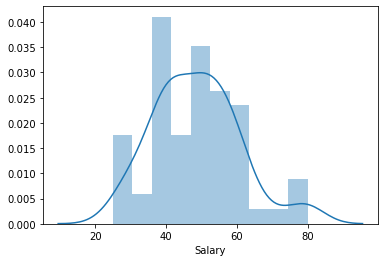

In [118]:
sns.distplot(df_survey['Salary'],bins=10,kde=True)

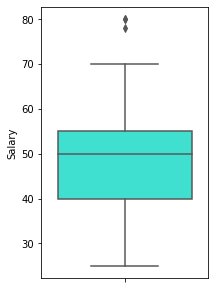

In [119]:
fig=plt.figure(figsize =(3,5)) 

sns.boxplot(df_survey['Salary'],color='Turquoise',saturation=4.5,linewidth=1.5,orient='v',)
plt.show()

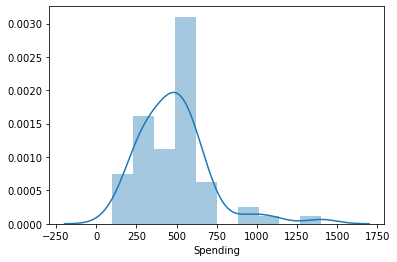

In [120]:
sns.distplot(df_survey['Spending'],bins=10,kde=True)

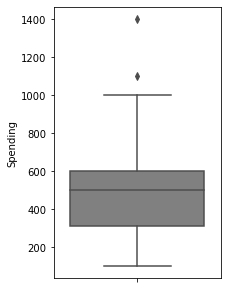

In [121]:
fig=plt.figure(figsize =(3,5)) 

sns.boxplot(df_survey['Spending'],color='gray',saturation=4.5,linewidth=1.5,orient='v',)
plt.show()

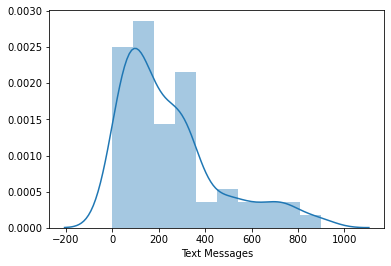

In [122]:
sns.distplot(df_survey['Text Messages'],bins=10,kde=True)

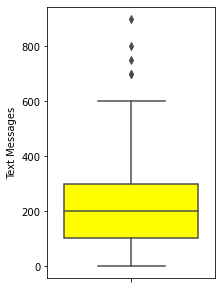

In [123]:
fig=plt.figure(figsize =(3,5)) 

sns.boxplot(df_survey['Text Messages'],color='yellow',saturation=4.5,linewidth=1.5,orient='v',)
plt.show()

In [124]:
data_normal = norm.rvs(size=62,loc=0,scale=1)


In [125]:
statistic,pvalue =stats.normaltest(df_survey["Salary"])
print("Normality test Results of Salary",'\n')
print("statistic value:  ",statistic)
print('pvalue:  ',pvalue)

Normality test Results of Salary 

statistic value:   3.84580947969415
pvalue:   0.14618172494628334


In [126]:
statistic,pvalue = stats.shapiro(df_survey['Salary'])
print("Shapiro-Wilk test Results of Salary",'\n')
print("statistic value:  ",statistic)
print('pvalue:  ',pvalue)

Shapiro-Wilk test Results of Salary 

statistic value:   0.9565856456756592
pvalue:   0.028000956401228905


In [127]:
#sns.distplot(data_normal,bins=10,kde=True)

In [128]:
from scipy.stats import shapiro

#### normality and shapiro for Spending


In [129]:
statistic,pvalue =stats.normaltest(df_survey["Spending"])
print("Normality test Results of Spending",'\n')
print("statistic value:  ",statistic)
print('pvalue:  ',pvalue)

Normality test Results of Spending 

statistic value:   30.49562450314631
pvalue:   2.387587398454289e-07


In [130]:
statistic,pvalue = stats.shapiro(df_survey['Spending'])
print("Shapiro-Wilk test Results of Spending",'\n')
print("statistic value:  ",statistic)
print('pvalue:  ',pvalue)

Shapiro-Wilk test Results of Spending 

statistic value:   0.8777452111244202
pvalue:   1.6854661225806922e-05


### normality and shapiro for Texting

In [131]:
statistic,pvalue =stats.normaltest(df_survey["Text Messages"])
print("Normality test Results of Text Messages",'\n')
print("statistic value:  ",statistic)
print('pvalue:  ',pvalue)

Normality test Results of Text Messages 

statistic value:   16.34755294390911
pvalue:   0.0002819512224692029


In [132]:
statistic,pvalue = stats.shapiro(df_survey['Text Messages'])
print("Shapiro-Wilk test Results of Text Messages",'\n')
print("statistic value:  ",statistic)
print('pvalue:  ',pvalue)

Shapiro-Wilk test Results of Text Messages 

statistic value:   0.8594191074371338
pvalue:   4.324040673964191e-06
